In [ ]:
print(adt.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import os
os.environ['CARTOPY_USER_BACKGROUNDS'] = 'D:/GITcode/Marine-Data'

# 读取nc文件
file_path = 'D:/data/CMEMS/MY/L4/SSH/dt_global_allsat_phy_l4_20170101_20241017.nc'
nc = Dataset(file_path)

# 提取参数
lon = nc.variables['longitude'][:]
lat = nc.variables['latitude'][:]
adt = nc.variables['adt'][:]
ugos = nc.variables['ugos'][:]
vgos = nc.variables['vgos'][:]

# 选取南海东北部范围
lon_min, lon_max = 115, 125
lat_min, lat_max = 15, 25

lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]

lon_subset = lon[lon_idx]
lat_subset = lat[lat_idx]
adt_subset = adt[0, lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
ugos_subset = ugos[0, lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
vgos_subset = vgos[0, lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]


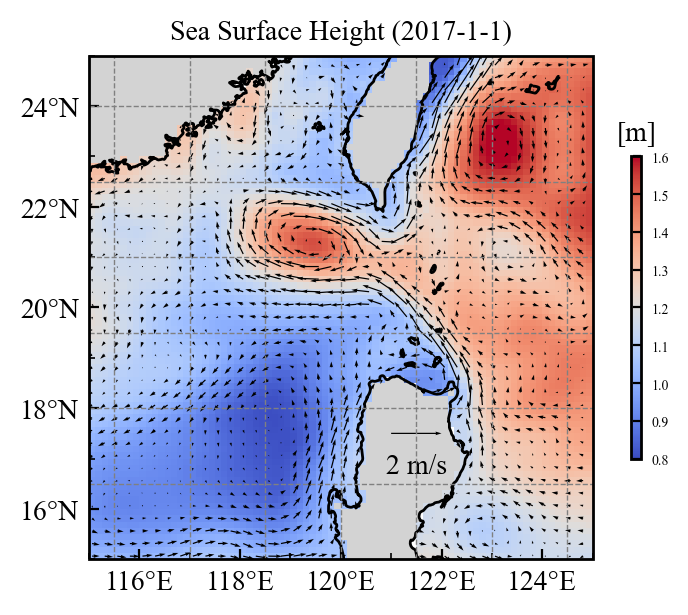

In [35]:

# 设置图形参数
plt.rcParams['font.size'] = 4
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形并设置大小
fig = plt.figure(figsize=(4, 3), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # 调整边距

# 创建投影
ax1 = plt.axes(projection=ccrs.PlateCarree())

# 设置投影范围为南海东北部
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 添加陆地背景
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# 绘制ADT分布图，并限制颜色映射范围
c = ax1.pcolormesh(lon_subset, lat_subset, adt_subset, shading='auto', cmap='coolwarm', vmin=0.8, vmax=1.6, transform=ccrs.PlateCarree())

# 绘制地转流u、v为流场，用箭头叠加到底图上面
q = ax1.quiver(lon_subset[::2], lat_subset[::2], ugos_subset[::2, ::2], vgos_subset[::2, ::2], transform=ccrs.PlateCarree(), scale=2, scale_units='xy', color='black')

# 添加比例尺
ax1.quiverkey(q, X=0.65, Y=0.25, U=2, label='2 m/s', labelpos='S', coordinates='axes', fontproperties={'size': 10})

# 添加颜色条并调整范围
cbar = fig.colorbar(c, ax=ax1, orientation='vertical', pad=0.05, shrink=0.6, aspect=30)
cbar.ax.set_title("[m]", fontsize=10)
cbar.ax.yaxis.set_label_position('right')
cbar.minorticks_off()
cbar.ax.tick_params(length=3,labelsize=5)


# 设置标题
ax1.set_title("Sea Surface Height (2017-1-1)", fontsize=10)

# 设置坐标轴
# ax1.set_xlabel("Longitude (°)", fontsize=12)
# ax1.set_ylabel("Latitude (°)", fontsize=12)

# 添加海岸线
ax1.coastlines(resolution='10m', linewidth=1)

# 设置刻度
ax1.set_xticks(np.arange(115, 125, 2), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(15, 25, 2), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax1.yaxis.set_major_locator(mticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))

# 设置刻度标签大小
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)

# 添加网格线
gridlines = ax1.gridlines(draw_labels=False, linestyle='--', linewidth=0.5, color='grey')


plt.tight_layout()
plt.show()

In [ ]:
print(lon_subset)
print(lat_subset)
print(adt_subset.shape)